# Etape1: IMPORTATION DES PACKAGES

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [21]:
# importation de WARNING
import warnings
warnings.filterwarnings("ignore")

# Etape2: CHARGEMENT DES DONNEES

In [22]:
data = pd.read_csv('darknet.csv')
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


In [23]:
# Le dataset contient 104 345 lignes et 23 colonnes
data.shape

(22576, 86)

# Etape3: ANALYSE DES DONEES

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Flow ID                     22576 non-null  object 
 2   Src IP                      22576 non-null  object 
 3   Src Port                    22576 non-null  int64  
 4   Dst IP                      22576 non-null  object 
 5   Dst Port                    22576 non-null  int64  
 6   Protocol                    22576 non-null  int64  
 7   Timestamp                   22576 non-null  object 
 8   Flow Duration               22576 non-null  int64  
 9   Total Fwd Packet            22576 non-null  int64  
 10  Total Bwd packets           22576 non-null  int64  
 11  Total Length of Fwd Packet  22576 non-null  int64  
 12  Total Length of Bwd Packet  22576 non-null  int64  
 13  Fwd Packet Length Max       225

In [25]:
# Données manquantes
data.isnull().sum()  # PAS DES COLONNES/LIGNES VIDES(pas des données manquantes)

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Label.1       0
Length: 86, dtype: int64

# Etape4: PRE-TRAITEMENT

In [26]:
# CREATION DE DICTINNAIRE POUR FAIRE LE MAPPING MANUELLEMENT DES ADRESSES IP
IP_Source_Mapping = {
    '10.0.0.1':1,
     '10.0.0.2':2,
     '10.0.0.3':3,
     '10.0.0.4':4,
     '10.0.0.5':5, 
}
data['Src IP'] = data['Src IP'].map(IP_Source_Mapping)

In [27]:
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,NaN,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1-8.0.6.4-0-0-0,NaN,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,NaN,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1-8.0.6.4-0-0-0,NaN,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,NaN,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


# Etape5: DIVISION DES DONNEES

In [28]:
x = data.iloc[: , :-1]
y = data.iloc[: , -1]

In [29]:
x

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,NaN,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,20,0,0,0,0,1.437590e+15,3.279907e+07,1.437590e+15,1.437590e+15,Non-Tor
1,32872,8.6.0.1-8.0.6.4-0-0-0,NaN,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,0,1.437590e+15,4.148861e+07,1.437590e+15,1.437590e+15,Non-Tor
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,NaN,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,20,0,0,0,0,1.437590e+15,3.454091e+07,1.437590e+15,1.437590e+15,Non-Tor
3,32874,8.6.0.1-8.0.6.4-0-0-0,NaN,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,0,1.437590e+15,4.664715e+07,1.437590e+15,1.437590e+15,Non-Tor
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,NaN,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,20,0,0,0,0,1.437590e+15,3.067507e+07,1.437590e+15,1.437590e+15,Non-Tor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,139214,10.8.8.130-64.4.23.162-52161-40019-6,NaN,52161,64.4.23.162,40019,6,5/6/2015 11:50,119786918,4,...,32,0,0,0,0,1.146810e+15,6.410880e+14,1.433520e+15,1.164131e+08,VPN
22572,139215,10.8.8.130-69.181.136.22-53288-57191-6,NaN,53288,69.181.136.22,57191,6,5/6/2015 11:50,119546234,21,...,32,0,0,0,0,1.433520e+15,3.446273e+07,1.433520e+15,1.433520e+15,VPN
22573,139216,10.8.8.130-69.181.136.22-49539-57191-17,NaN,49539,69.181.136.22,57191,17,5/6/2015 11:50,119749355,24,...,8,0,0,0,0,1.382320e+15,2.709090e+14,1.433520e+15,1.976405e+07,VPN
22574,139217,10.8.8.130-81.137.205.196-49539-23528-17,NaN,49539,81.137.205.196,23528,17,5/6/2015 11:50,119992029,8,...,8,0,0,0,0,1.433520e+15,3.566404e+07,1.433520e+15,1.433520e+15,VPN


In [30]:
print(x.shape)
print(y.shape)

(22576, 85)
(22576,)


In [88]:
data.corr().Timestamp.sort_values(ascending = False)

Timestamp              1.000000
Label.1                0.439364
FIN Flag Count         0.389586
SYN Flag Count         0.339626
Fwd Seg Size Min       0.327050
                         ...   
ECE Flag Count              NaN
Fwd Bytes/Bulk Avg          NaN
Fwd Packet/Bulk Avg         NaN
Fwd Bulk Rate Avg           NaN
Bwd Bytes/Bulk Avg          NaN
Name: Timestamp, Length: 81, dtype: float64

## Ecndoding

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [38]:
list_object = ['Flow ID','Src IP', 'Dst IP', 'Timestamp','Label','Label.1']
label_encoder = LabelEncoder()
for type in list_object:
    data[type] = label_encoder.fit_transform(data[type])

In [39]:
data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,14445,0,5222,4,56297,6,472,60320002,5,...,0,0,0,0,1.437590e+15,3.279907e+07,1.437590e+15,1.437590e+15,0,0
1,32872,14758,0,0,1458,0,0,472,100709850,6,...,0,0,0,0,1.437590e+15,4.148861e+07,1.437590e+15,1.437590e+15,0,0
2,32873,14445,0,5222,4,56297,6,465,116498878,12,...,0,0,0,0,1.437590e+15,3.454091e+07,1.437590e+15,1.437590e+15,0,0
3,32874,14758,0,0,1458,0,0,465,93296196,6,...,0,0,0,0,1.437590e+15,4.664715e+07,1.437590e+15,1.437590e+15,0,0
4,32875,14445,0,5222,4,56297,6,466,91832679,14,...,0,0,0,0,1.437590e+15,3.067507e+07,1.437590e+15,1.437590e+15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,139214,6720,0,52161,1174,40019,6,328,119786918,4,...,0,0,0,0,1.146810e+15,6.410880e+14,1.433520e+15,1.164131e+08,3,1
22572,139215,6739,0,53288,1266,57191,6,328,119546234,21,...,0,0,0,0,1.433520e+15,3.446273e+07,1.433520e+15,1.433520e+15,3,1
22573,139216,6738,0,49539,1266,57191,17,328,119749355,24,...,0,0,0,0,1.382320e+15,2.709090e+14,1.433520e+15,1.976405e+07,3,1
22574,139217,6920,0,49539,1474,23528,17,328,119992029,8,...,0,0,0,0,1.433520e+15,3.566404e+07,1.433520e+15,1.433520e+15,3,1


In [40]:
data = data.drop(columns=['Subflow Bwd Packets', 'Active Mean','Active Std','Active Max','Active Min'])
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,14445,0,5222,4,56297,6,472,60320002,5,...,4547,4547,2,20,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0,0
1,32872,14758,0,0,1458,0,0,472,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0,0
2,32873,14445,0,5222,4,56297,6,465,116498878,12,...,2640,4547,7,20,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0,0
3,32874,14758,0,0,1458,0,0,465,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0,0
4,32875,14445,0,5222,4,56297,6,466,91832679,14,...,2640,4547,8,20,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0,0


<Axes: >

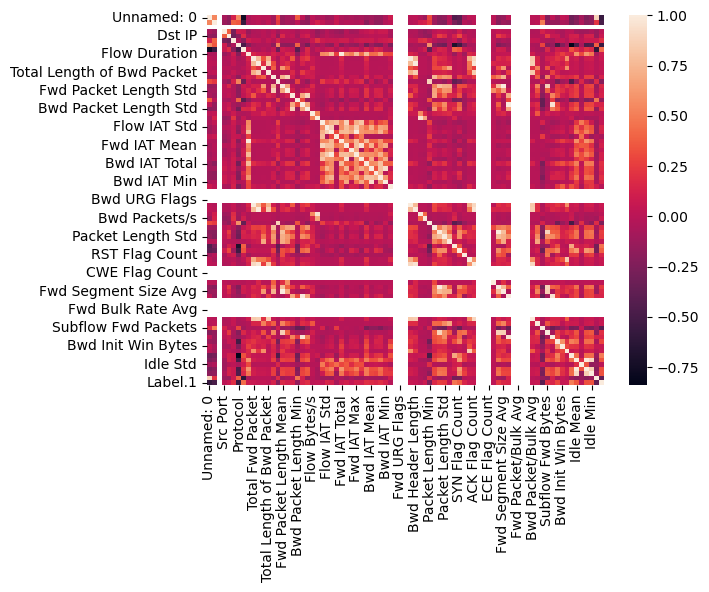

In [42]:
sns.heatmap(data.corr(), annot=False) # CELUI-CI N'AFFICHE PAS LES VALEURS DANS LES CELLULES

<Axes: >

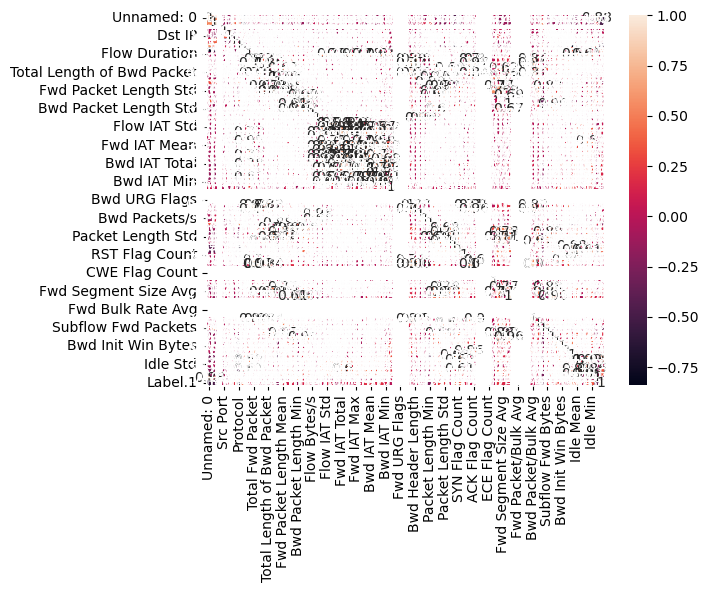

In [43]:
sns.heatmap(data.corr(), annot=True)

# Etape5: DIVISION DES DONNEES---Test et Train

In [45]:
x = data.iloc[: , :-1]
y = data.iloc[: , -1]
x

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,32871,14445,0,5222,4,56297,6,472,60320002,5,...,14,4547,4547,2,20,1.437590e+15,3.279907e+07,1.437590e+15,1.437590e+15,0
1,32872,14758,0,0,1458,0,0,472,100709850,6,...,0,0,0,0,0,1.437590e+15,4.148861e+07,1.437590e+15,1.437590e+15,0
2,32873,14445,0,5222,4,56297,6,465,116498878,12,...,108,2640,4547,7,20,1.437590e+15,3.454091e+07,1.437590e+15,1.437590e+15,0
3,32874,14758,0,0,1458,0,0,465,93296196,6,...,0,0,0,0,0,1.437590e+15,4.664715e+07,1.437590e+15,1.437590e+15,0
4,32875,14445,0,5222,4,56297,6,466,91832679,14,...,98,2640,4547,8,20,1.437590e+15,3.067507e+07,1.437590e+15,1.437590e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,139214,6720,0,52161,1174,40019,6,328,119786918,4,...,0,60,60,2,32,1.146810e+15,6.410880e+14,1.433520e+15,1.164131e+08,3
22572,139215,6739,0,53288,1266,57191,6,328,119546234,21,...,2,256,255,10,32,1.433520e+15,3.446273e+07,1.433520e+15,1.433520e+15,3
22573,139216,6738,0,49539,1266,57191,17,328,119749355,24,...,3,0,0,23,8,1.382320e+15,2.709090e+14,1.433520e+15,1.976405e+07,3
22574,139217,6920,0,49539,1474,23528,17,328,119992029,8,...,9,0,0,7,8,1.433520e+15,3.566404e+07,1.433520e+15,1.433520e+15,3


In [50]:
data.corr().Timestamp.sort_values(ascending = False)

Timestamp              1.000000
Label.1                0.439414
FIN Flag Count         0.390174
SYN Flag Count         0.339072
Fwd Seg Size Min       0.327356
                         ...   
ECE Flag Count              NaN
Fwd Bytes/Bulk Avg          NaN
Fwd Packet/Bulk Avg         NaN
Fwd Bulk Rate Avg           NaN
Bwd Bytes/Bulk Avg          NaN
Name: Timestamp, Length: 81, dtype: float64

<Axes: >

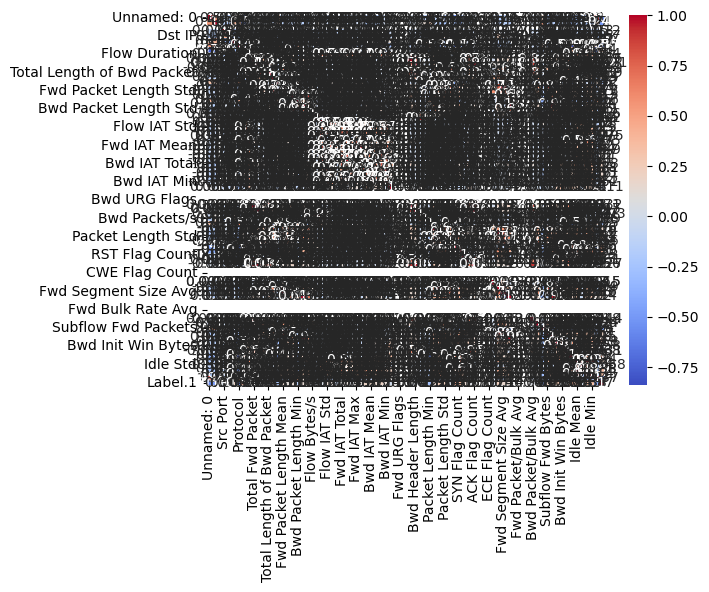

In [52]:
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

In [53]:
# Création de x_train et x_test, y_train et y_test
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=35)

In [55]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (15803, 80)
y_train shape: (15803,)
x_test shape: (6773, 80)
y_test shape: (6773,)


In [73]:
x.shape

(22576, 80)

### Normalisation des données

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout,Dense

In [62]:
from sklearn.preprocessing import StandardScaler



### Suppression de NaN

In [65]:
# Remplacer les valeurs infinies par NaN
#data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ou supprimer les lignes contenant des NaN
data.dropna(inplace=True)

In [66]:
# Vérifier les valeurs trop grandes
large_values = data[data > 1e308]
print("Valeurs trop grandes :")
print(large_values)

Valeurs trop grandes :
       Unnamed: 0  Flow ID  Src IP  Src Port  Dst IP  Dst Port  Protocol  \
0             NaN      NaN     NaN       NaN     NaN       NaN       NaN   
1             NaN      NaN     NaN       NaN     NaN       NaN       NaN   
2             NaN      NaN     NaN       NaN     NaN       NaN       NaN   
3             NaN      NaN     NaN       NaN     NaN       NaN       NaN   
4             NaN      NaN     NaN       NaN     NaN       NaN       NaN   
...           ...      ...     ...       ...     ...       ...       ...   
22571         NaN      NaN     NaN       NaN     NaN       NaN       NaN   
22572         NaN      NaN     NaN       NaN     NaN       NaN       NaN   
22573         NaN      NaN     NaN       NaN     NaN       NaN       NaN   
22574         NaN      NaN     NaN       NaN     NaN       NaN       NaN   
22575         NaN      NaN     NaN       NaN     NaN       NaN       NaN   

       Timestamp  Flow Duration  Total Fwd Packet  ...  FWD Init

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [95]:
model_dnn = tf.keras.models.Sequential()

In [108]:
# AJOUT DE LA 1ère COUCHE
model_dnn.add(Dense(50, input_shape=(80,), activation='relu'))

# AJOUT DE INTERMEDIAIRE 1
model_dnn.add(Dense(30, activation='relu'))



# COUCHE DE SORTIE
model_dnn.add(Dense(1, activation='sigmoid'))



model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 50)             │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 25)             │           275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,714 (30.13 KB)

 Trainable params: 7,714 (30.13 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
history = model_dnn.fit(x_train, y_train, epochs=150, verbose=1, validation_data=(x_test, y_test))

Epoch 1/150
494/494 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4988 - loss: 0.6943 - val_accuracy: 0.5140 - val_loss: 0.6928
Epoch 2/150
494/494 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4847 - loss: 0.6939 - val_accuracy: 0.5140 - val_loss: 0.6928
Epoch 3/150
494/494 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5087 - loss: 0.6933 - val_accuracy: 0.4860 - val_loss: 0.6946
Epoch 4/150
494/494 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5023 - loss: 0.6934 - val_accuracy: 0.5140 - val_loss: 0.6928
Epoch 5/150
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5100 - loss: 0.6930 - val_accuracy: 0.5140 - val_loss: 0.6929
Epoch 6/150
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5043 - loss: 0.6932 - val_accuracy: 0.4860 - val_loss: 0.6932
Epoch 7/150
494/494 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5021 - loss: 0.6932 - val_accuracy: 0.5140 - val_loss: 0.6929
Epoch 8/150
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accu

In [83]:
#model_dnn.summary()

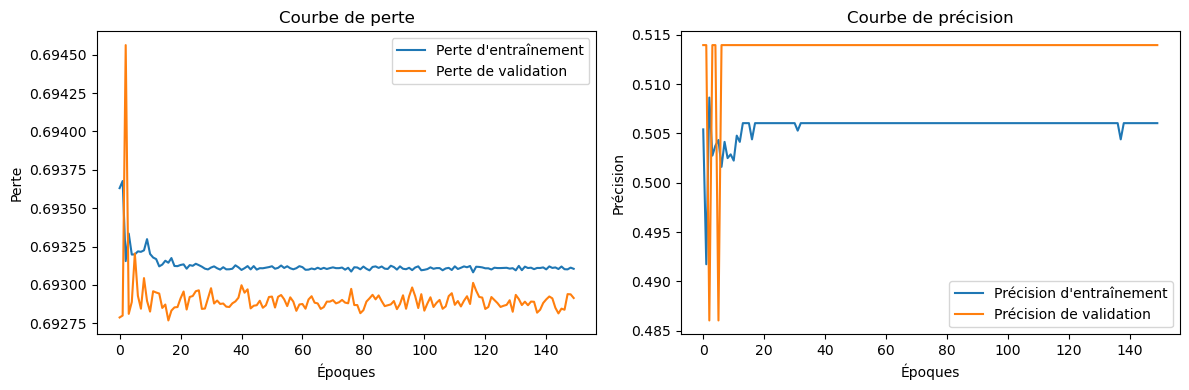

In [110]:
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà entraîné un modèle et enregistré l'historique
#history = LinearRegress_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)

# Tracer la perte
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Tracer la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Courbe de précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()